The test problem we will be using in this tutorial is the iris classification.

The problem is comprised of 150 observations of iris flowers from three different species. There are 4 measurements of given flowers: sepal length, sepal width, petal length, and petal width, all in the same unit of centimeters. The predicted attribute is the species, which is one of Setosa, Versicolor, or Virginica.

It is a standard dataset where the species is known for all instances. As such we can split the data into training and test datasets and use the results to evaluate our algorithm implementation. Good classification accuracy on this problem is above 90% correct, typically 96% or better.

Save the file in your current working directory with the file name “iris.data“.

This tutorial is broken down into the following steps:

Handle Data: Open the dataset from CSV and split it into test/train datasets.

Similarity: Calculate the distance between two data instances.

Neighbors: Locate k most similar data instances.

Response: Generate a response from a set of data instances.

Accuracy: Summarize the accuracy of predictions.

Main: Tie it all together.



1. Handle Data

The first thing we need to do is load our data file. 

import csv

with open('iris.data.txt', 'r') as csvfile:

lines = csv.reader(csvfile)

for row in lines :

print (', '.join(row))

Next we need to split the data into a training dataset 

import csv

import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):

with open(filename, 'r') as csvfile:

  lines = csv.reader(csvfile)

  dataset = list(lines)

  for x in range(len(dataset)-1):

    for y in range(4):

      dataset[x][y] = float(dataset[x][y])

    if random.random() < split:

      complete code

    else:

      complete code

We can test this function out with our iris dataset, as follows:

trainingSet=[]

testSet=[]

loadDataset('iris.data', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

In [2]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing
#Visualization
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score # Accuracy score

In [3]:

# importing panda library
import pandas as pd
  
# readinag given csv file
# and creating dataframe
df= pd.read_csv("iris.data.txt")
  
# storing this dataframe in a csv file
df.to_csv('iris.data.csv', 
                  index = None)

In [4]:
df.head() # first 5 entries of the dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().values.any()

False

In [8]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [9]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['class'].value_counts()


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

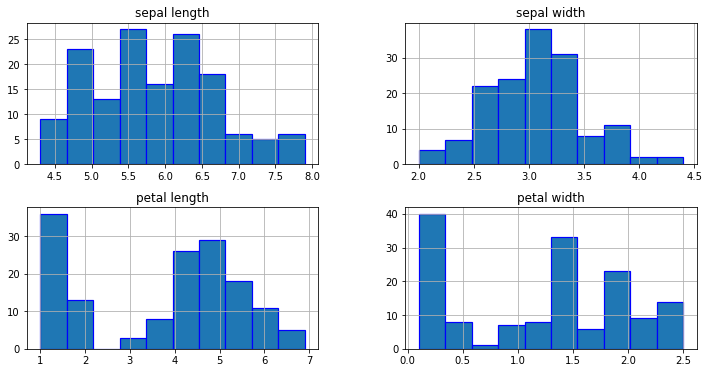

In [12]:
# The Histogram representation of the univariate plots for each measurement

np = df.drop('class', axis=1) # dropping the Id 
np.hist(edgecolor='blue', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Next we need to split the data into a training dataset 

import csv

import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):

with open(filename, 'r') as csvfile:

  lines = csv.reader(csvfile)

  dataset = list(lines)

  for x in range(len(dataset)-1):

    for y in range(4):

      dataset[x][y] = float(dataset[x][y])

    if random.random() < split:

      complete code

In [13]:
import csv

import random


In [14]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
  with open(filename, 'r') as csvfile:
     lines = csv.reader(csvfile)
     dataset = list(lines)
     for x in range(len(dataset)-1):
         for y in range(4):
             dataset[x][y] = float(dataset[x][y])
         if random.random() < split:
             trainingSet.append(dataset[x])
         else:
             testSet.append(dataset[x])

We can test this function out with our iris dataset, as follows:

trainingSet=[]

testSet=[]

loadDataset('iris.data', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

In [15]:
trainingSet=[]

testSet=[]

loadDataset('iris.data.csv', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

Train: 94
Test: 55


2. Similarity

To make predictions we need to calculate the similarity between any two given data instances. This is needed so that we can locate the k most similar data instances in the training dataset for a given member of the test dataset and in turn, make a prediction.

Given that all four flower measurements are numeric and have the same units, we can directly use the Euclidean distance measure. 

Additionally, we want to control which fields to include in the distance calculation. Specifically, we only want to include the first 4 attributes. One approach is to limit the Euclidean distance to a fixed length, ignoring the final dimension.

Putting all of this together, you have to define the euclidean distance

import math

def euclideanDistance(instance1, instance2, length):

      Complete the function

Note here that 

number of elements in the instance1 =number of elements in the instance2 

the length refers to the number of elements in the instance1 

We can test this function with some sample data, as follows:

data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print 'Distance: ' + repr(distance)

In [16]:
import math


In [17]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


In [22]:
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print ('distance: ' + repr(distance))

distance: 3.4641016151377544


3. Neighbors

Now that we have a similarity measure, we can use it to collect the k most similar instances for a given unseen instance.

This is a straightforward process of calculating the distance for all instances and selecting a subset with the smallest distance values.

Below is the getNeighbors function that returns k most similar neighbors from the training set for a given test instance (using the already defined euclideanDistance function)

import operator

def getNeighbors(trainingSet, testInstance, k):

distances = []

length = len(testInstance)-1

for x in range(len(trainingSet)):

dist = euclideanDistance(testInstance, trainingSet[x], length)

distances.append((trainingSet[x], dist))

distances.sort(key=operator.itemgetter(1))

neighbors = []

for x in range(k):

neighbors.append(distances[x][0])

return neighbors

We can test out this function as follows:

trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

In [26]:
import operator
      # TesInstance: Data to be Predicted
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        #testinstance
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        #distances.append(dist)
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
        return neighbors



In [27]:
#We can test out this function as follows:

trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

[[4, 4, 4, 'b']]


4. Response

Once we have located the most similar neighbors for a test instance, the next task is to devise a predicted response based on those neighbors.

We can do this by allowing each neighbor to vote for their class attribute, and take the majority vote as the prediction.

Below provides a function for getting the majority voted response from a number of neighbors. It assumes the class is the last attribute for each neighbor.

import operator

def getResponse(neighbors):

classVotes = {}

for x in range(len(neighbors)):

response = neighbors[x][ ? ] #complete with appropriate number

if response in classVotes:

Complete the if clause

sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

return sortedVotes[0][0]

We can test out this function with some test neighbors, as follows:

neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

This approach returns one response in the case of a draw, but you could handle such cases in a specific way, such as returning no response or selecting an u

In [39]:
import operator

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1] #complete with appropriate number
        if response in classVotes:
            classVotes[response] += 1 
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=None, reverse=True)
    return sortedVotes[0][0] 
        



           

In [40]:
#We can test out this function with some test neighbors, as follows:

neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

b


5. Accuracy

We have all of the pieces of the kNN algorithm in place. An important remaining concern is how to evaluate the accuracy of predictions.

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made, called the classification accuracy.

Below is the getAccuracy function that sums the total correct predictions and returns the accuracy as a percentage of correct classifications.

def getAccuracy(testSet, predictions):

Complete the function

return (correct/float(len(testSet))) * 100.0

We can test this function with a test dataset and predictions, as follows:

testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)

In [41]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [42]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


6. Main

We now have all the elements of the algorithm you can put them all in one main function

7. Another distance metric

In this part, you are asked to define another distance metric instead of euclidean distance

AttributeError: 'float' object has no attribute 'cityblock'

AttributeError: 'float' object has no attribute 'minkowski'

In [47]:


def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return (1-cos)